In [137]:
# https://github.com/tallesfelix/directions-with-osm-networkx/blob/master/Creating%20routes%20with%20networkx%20and%20ipyleaflet.ipynb
import networkx as nx
import osmnx as ox
from shapely.geometry import LineString, mapping
import geopandas as gpd
from ipyleaflet import *

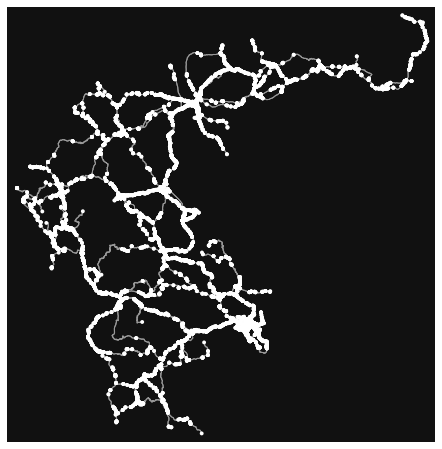

In [2]:
place_name = "Greece"
ox.config(use_cache=True, log_console=True)
#cf = '["highway"~"motorway|motorway_link|trunk|secondary|primary"]'
cf = '["highway"~"motorway|motorway_link|trunk|trunk_link|primary_link|primary"]'
graph = ox.graph_from_place(place_name, network_type='drive', custom_filter=cf)
fig, ax = ox.plot_graph(graph)

In [3]:
nodes, edges = ox.graph_to_gdfs(graph)
nodes

,y,x,osmid,highway,ref,geometry
26738016,37.716458,24.054811,26738016,NaN,NaN,POINT (24.05481 37.71646)
276542259,37.747751,23.905221,276542259,NaN,NaN,POINT (23.90522 37.74775)
276542471,37.785918,23.886669,276542471,NaN,NaN,POINT (23.88667 37.78592)
276542533,37.814418,23.843923,276542533,NaN,NaN,POINT (23.84392 37.81442)
276542704,37.815326,23.833636,276542704,NaN,NaN,POINT (23.83364 37.81533)
...,...,...,...,...,...,...
1421511783,39.652249,20.157487,1421511783,NaN,NaN,POINT (20.15749 39.65225)
1421512259,39.650549,20.160456,1421512259,NaN,NaN,POINT (20.16046 39.65055)
1423151279,39.910536,20.369289,1423151279,NaN,NaN,POINT (20.36929 39.91054)
7143460162,39.910713,20.363622,7143460162,NaN,NaN,POINT (20.36362 39.91071)


In [4]:
center = (37.714155,24.056792)
m = Map(center=center, basemap=basemaps.CartoDB.Positron, zoom=8)
m

Map(center=[37.714155, 24.056792], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [5]:
edges

,osmid,oneway,ref,name,highway,length,geometry,lanes,maxspeed,bridge,tunnel,junction,access,width,est_width,service,area,u,v,key
0,"[680833745, 680834433, 47105933]",True,ΕΟ89,Ηρώων Πολυτεχνείου,primary,244.776,"LINESTRING (24.05481 37.71646, 24.05478 37.716...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26738016,6375260438,0
1,291932660,False,ΕΟ89,Λαυρίου,primary,939.063,"LINESTRING (24.05481 37.71646, 24.05451 37.716...",2,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26738016,2954361205,0
2,"[854132174, 854132175, 328252052, 457001366, 3...",True,ΕΟ91,Αθήνών - Σουνίου,primary,300.392,"LINESTRING (23.90522 37.74775, 23.90540 37.747...",2,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276542259,3350664797,0
3,"[389226497, 883327814]",False,ΕΟ91,Αθήνών - Σουνίου,primary,3992.896,"LINESTRING (23.90522 37.74775, 23.90515 37.747...",NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276542259,1270248182,0
4,444148997,True,ΕΟ91,Αθήνών - Σουνίου,primary,25.333,"LINESTRING (23.88667 37.78592, 23.88662 37.786...",2,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276542471,1838193334,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18312,"[128894467, 128894509, 128894469, 128894511]",True,ΕΟ22,Καλπακίου - Κακαβιάς,trunk,523.387,"LINESTRING (20.36929 39.91054, 20.36909 39.910...","[2, 1]","[30, 50]",yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1423151279,623809603,0
18313,"[128894500, 128898276, 128898299, 128894516, 1...",False,ΕΟ22,Καλπακίου - Κακαβιάς,trunk,3120.630,"LINESTRING (20.36929 39.91054, 20.36935 39.910...",2,"[50, 80]",yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1423151279,1423186312,0
18314,26944477,True,ΕΟ22,NaN,trunk,20.303,"LINESTRING (20.36362 39.91071, 20.36365 39.910...",NaN,30,NaN,NaN,roundabout,NaN,NaN,NaN,NaN,NaN,7143460162,623809603,0
18315,"[128894480, 128894465, 290802435, 128894492]",True,ΕΟ22,Καλπακίου - Κακαβιάς,trunk,516.059,"LINESTRING (20.36362 39.91071, 20.36379 39.910...","[2, 1]","[30, 50]",yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7143460162,1423151279,0


In [17]:
to_marker_style = AwesomeIcon(
    name='circle',
    icon_color='white',
    marker_color='red',
    spin=False
)
from_marker = Marker(location=center)
print(from_marker)
to_marker = Marker(location=center, icon=to_marker_style)

Marker(location=[37.714155, 24.056792], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'rotation_angle', 'rotation_origin', 'title', 'z_index_offset'])


In [18]:
def set_nearest_node(marker):
 marker.nearest_node = ox.get_nearest_node(graph, marker.location)
 print(marker.nearest_node)
 return

In [19]:
path_layer_list = []
def handle_change_location(event, marker):
    event_owner = event['owner']
    event_owner.nearest_node = ox.get_nearest_node(graph, event_owner.location)
    marker.nearest_node = ox.get_nearest_node(graph, marker.location)
    
    shortest_path = nx.dijkstra_path(graph, event_owner.nearest_node, marker.nearest_node, 
                                     weight='length')
    
    if len(path_layer_list) == 1:
        m.remove_layer(path_layer_list[0])
        path_layer_list.pop()
    
    shortest_path_points = nodes.loc[shortest_path]
    path = gpd.GeoDataFrame([LineString(shortest_path_points.geometry.values)], columns=['geometry'])
    path_layer = GeoData(geo_dataframe=path, style={'color':'black', 'weight':2})
    m.add_layer(path_layer)
    path_layer_list.append(path_layer)

In [20]:
from_marker.observe(lambda event: handle_change_location(event, to_marker), 'location')
to_marker.observe(lambda event: handle_change_location(event, from_marker), 'location')

In [21]:
m.add_layer(from_marker)
m.add_layer(to_marker)

set_nearest_node(from_marker)
set_nearest_node(to_marker)
m

6375260429
6375260429


Map(bottom=25545.0, center=[37.714155, 24.056792], controls=(ZoomControl(options=['position', 'zoom_in_text', …

In [55]:
st = set_nearest_node(from_marker)
en = set_nearest_node(to_marker)
print(st, en)

6375260429
480000301
None None


In [56]:
import numpy as np
def add_load_column(nodes, name='traffic'):
    nodes[name] = 0

def get_shortest_path(g, u, v):
    shortest_path = nx.dijkstra_path(g, u, v, weight='length')
    return shortest_path

def update_nodes(shortest_path, nodes, col_name, cost):
    for n in shortest_path:
        nodes.loc[nodes.osmid == n, col_name] += cost

In [57]:
def get_nodes_pairs(a_list):
    """ Algorithm:
    - create a stop condition (the last element of the input list)
    - iterate the list keeping the current and the next element.
    - return pairs of (current, next) nodes and append them to a new list.
    - when the next node equals the last item of the list (stop condition), then
    - exit the loop and
    - return the list.
    
    :param: list: a list of ints
    :return: list of tuples (containing <u, v> pairs)
    """
    all_pairs = []
    stop_condition = a_list[-1]
    cont = True
    while cont:
        for idx, elem in enumerate(a_list):
            u = elem
            v = a_list[(idx+1) % len(a_list)]
            if v == stop_condition:
                cont = False
            else:
                all_pairs.append((u, v))
    return all_pairs

def update_edge_list(all_pairs_list, edges_list, col_name, cost):
    for pair in all_pairs_list:
        u, v = pair
        edges_list.loc[(edges_list.u == u) & (edges_list.v == v), col_name] += cost
        

In [139]:
loaded_edges = edges.loc[edges['traffic'] >0]
print(len(loaded_edges))

361


In [59]:
import pdb

In [60]:
def split_rows(df, li, ids):
    ids_list = ids
    for id in ids_list:
        copied_df = df.copy()
        copied_df.osmid = id
        li.append(copied_df)

#test_edges.replace(x, splitted_ids)
def split_osmid_field(loaded_edges):
    splitted_rows = []
    print(len(splitted_rows))
    for i in range(len(loaded_edges)):
        df = loaded_edges.iloc[[i]]
        osmid_contents = (df.osmid.to_list()).pop()
        #pdb.set_trace()
        if type(osmid_contents) is not list:
            splitted_rows.append(df)
        else:
            split_rows(df, splitted_rows, osmid_contents)
    return splitted_rows

In [61]:
def populate_network_traffic(graph, edges, start1, end1, start2, end2):
    # create edges traffic column and populate it with content
    add_load_column(edges)
    
    # run shortest path (nodes form)
    shortest_path = get_shortest_path(graph, start1, end1)    
    min_path_pairs = get_nodes_pairs(shortest_path)
    update_edge_list(min_path_pairs, edges, 'traffic', 300)
    
    # run shortest path again and add the results
    shortest_path2 = get_shortest_path(graph, start2, end2)    
    min_path_pairs2 = get_nodes_pairs(shortest_path2)
    update_edge_list(min_path_pairs2, edges, 'traffic', 500)
    
    loaded_edges = edges.loc[edges['traffic'] >0]
    return loaded_edges

In [91]:
import pandas as pd
#traffic_edges = populate_network_traffic(edges, edges.u[1000], edges.u[11000], edges.u[100], edges.u[14000])
#traffic_edges = populate_network_traffic(graph, edges, 3744263637, 300972555, 295512257, 1604968703)
traffic_edges = populate_network_traffic(graph, edges, 305080528, 152770273, 130245492, 152770273)
some_rows = split_osmid_field(traffic_edges)
len(some_rows)
loaded_edges_df = pd.concat(some_rows)
print(len(loaded_edges_df))
loaded_edges_df['osmid'] = loaded_edges_df['osmid'].astype(str)
loaded_edges_df.to_csv('loaded_edges.csv')

0
1339


In [104]:
# all edges to a single csv file.
all_edges_df = split_osmid_field(edges)
len(all_edges_df)
all_edges = pd.concat(all_edges_df)
all_edges['osmid'] = all_edges['osmid'].astype(str)
all_edges.to_csv('loaded_edges.csv')

0


In [106]:
# all nodes to a single csv file.
nodes.to_csv('all_nodes.csv')

In [158]:
#edges.loc[edges['osmid'] == 127586502]
nodes.loc[nodes['osmid'] == 153845043]
#all_edges.loc[all_edges['osmid'] == 127586502]

,y,x,osmid,highway,ref,geometry,traffic
153845043,38.055342,23.71329,153845043,NaN,NaN,POINT (23.71329 38.05534),0


In [39]:
edges.loc[edges['traffic'] >400]

,osmid,oneway,ref,name,highway,length,geometry,lanes,maxspeed,bridge,...,junction,access,width,est_width,service,area,u,v,key,traffic


In [119]:
    edges[edges['name'] == 'Καναλλάκι - Νεράιδα']

,osmid,oneway,ref,name,highway,length,geometry,lanes,maxspeed,bridge,...,junction,access,width,est_width,service,area,u,v,key,traffic


In [ ]:
#simple_graph = ox.graph_from_place(place_name, network_type='drive', simplify=False, custom_filter=cf)
#simple_nodes, simple_edges = ox.graph_to_gdfs(simple_graph)

In [ ]:
len(simple_edges)

In [252]:
print(len(simple_edges['osmid'].unique()))

71048


In [42]:
#loaded_edges_df[loaded_edges_df['traffic'] > 300]
print(len(loaded_edges_df['osmid'].unique()))
print(len(loaded_edges_df))

NameError: name 'loaded_edges_df' is not defined

In [92]:
#x = loaded_edges_df[loaded_edges_df['osmid'].duplicated()]
x = loaded_edges_df[loaded_edges_df['osmid'].duplicated()]
x['osmid'] = x['osmid'].astype(str)
x.to_csv('duplicated_str.csv')

/home/blaxeep/.local/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


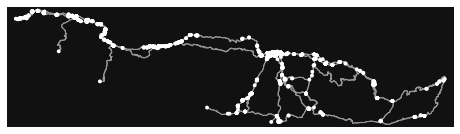

In [108]:
creta_place_name = "Creta"
ox.config(use_cache=True, log_console=True)
#cf = '["highway"~"motorway|motorway_link|trunk|secondary|primary"]'
cf = '["highway"~"motorway|motorway_link|trunk|trunk_link|primary_link|primary"]'
creta_graph = ox.graph_from_place(creta_place_name, network_type='drive', custom_filter=cf)
fig, ax = ox.plot_graph(creta_graph)
creta_nodes, creta_edges = ox.graph_to_gdfs(creta_graph)

In [140]:
skat = pd.read_csv('../data/POINTS_NUTS3_MAINLAND.csv', sep=';')

In [156]:
for i in skat['node_id']:
    if i not in nodes['osmid']:
        print(i)

27809603


In [159]:
ox.save_graphml(graph, '/home/blaxeep/workspace/osm_project/results/greece.graphml')

In [160]:
x = ox.load_graphml('/home/blaxeep/workspace/osm_project/results/greece.graphml')

In [161]:
n, e = ox.graph_to_gdfs(x)

In [163]:
len(e)

18317